In [2]:
import pandas as pd

In [3]:
text_cln=pd.read_csv('E:/COVID.csv', encoding='ISO-8859-1')


In [4]:
#Number of Words
text_cln['word_count'] = text_cln['text'].apply(lambda x: len(str(x).split(" ")))
text_cln[['text','word_count']].head()

,text,word_count
0,"RT @SuMoh7: ð¨â¡ï¸MUST READ, RT! &gt;&gt; ...",22
1,RT @Pvsindhu1: Letâs clap for those who kee...,14
2,RT @TrumperSeaney: ð¨ð¨ð¨ @SpeakerPelosi...,20
3,RT @AlphonsusUdeze: Congratulations senator or...,24
4,RT @PLSPeaceAgency: The Plateau State Governme...,17


In [5]:
# Number of characters
text_cln['char_count'] = text_cln['text'].str.len() ## this also includes spaces
text_cln[['text','char_count']].head()

,text,char_count
0,"RT @SuMoh7: ð¨â¡ï¸MUST READ, RT! &gt;&gt; ...",159
1,RT @Pvsindhu1: Letâs clap for those who kee...,104
2,RT @TrumperSeaney: ð¨ð¨ð¨ @SpeakerPelosi...,159
3,RT @AlphonsusUdeze: Congratulations senator or...,142
4,RT @PLSPeaceAgency: The Plateau State Governme...,144


In [6]:
# Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

text_cln['avg_word'] = text_cln['text'].apply(lambda x: avg_word(x))
text_cln[['text','avg_word']].head()


,text,avg_word
0,"RT @SuMoh7: ð¨â¡ï¸MUST READ, RT! &gt;&gt; ...",6.181818
1,RT @Pvsindhu1: Letâs clap for those who kee...,6.923077
2,RT @TrumperSeaney: ð¨ð¨ð¨ @SpeakerPelosi...,7.000000
3,RT @AlphonsusUdeze: Congratulations senator or...,4.680000
4,RT @PLSPeaceAgency: The Plateau State Governme...,7.055556


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SVSS2195\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

text_cln['stopwords'] = text_cln['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
text_cln[['text','stopwords']].head()

,text,stopwords
0,"RT @SuMoh7: ð¨â¡ï¸MUST READ, RT! &gt;&gt; ...",1
1,RT @Pvsindhu1: Letâs clap for those who kee...,3
2,RT @TrumperSeaney: ð¨ð¨ð¨ @SpeakerPelosi...,0
3,RT @AlphonsusUdeze: Congratulations senator or...,4
4,RT @PLSPeaceAgency: The Plateau State Governme...,3


In [9]:
# Number of special characters
text_cln['tags'] = text_cln['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
text_cln[['text','tags']].head()

,text,tags
0,"RT @SuMoh7: ð¨â¡ï¸MUST READ, RT! &gt;&gt; ...",1
1,RT @Pvsindhu1: Letâs clap for those who kee...,1
2,RT @TrumperSeaney: ð¨ð¨ð¨ @SpeakerPelosi...,3
3,RT @AlphonsusUdeze: Congratulations senator or...,1
4,RT @PLSPeaceAgency: The Plateau State Governme...,1


In [10]:
# Number of numerics
text_cln['numerics'] = text_cln['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
text_cln[['text','numerics']].tail()

,text,numerics
2995,RT @SiouxsieW: Heard of #FlattenTheCurve &amp;...,0
2996,RT @SiouxsieW: Heard of #FlattenTheCurve &amp;...,0
2997,RT @MasriAhmadMD: Remdesivir no more for now \...,0
2998,RT @Anna_Soubry: No wonder people are ignoring...,0
2999,RT @TOIHyderabad: #CoronaVirusUpdates || Three...,0


In [11]:
# Number of Uppercase words
text_cln['upper_case'] = text_cln['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
text_cln[['text','upper_case']].head()

,text,upper_case
0,"RT @SuMoh7: ð¨â¡ï¸MUST READ, RT! &gt;&gt; ...",6
1,RT @Pvsindhu1: Letâs clap for those who kee...,1
2,RT @TrumperSeaney: ð¨ð¨ð¨ @SpeakerPelosi...,11
3,RT @AlphonsusUdeze: Congratulations senator or...,1
4,RT @PLSPeaceAgency: The Plateau State Governme...,1


In [12]:
# Converting to Lower case
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text_cln['text'].head()

0    rt @sumoh7: ð¨â¡ï¸must read, rt! &gt;&gt; ...
1    rt @pvsindhu1: letâs clap for those who keep...
2    rt @trumperseaney: ð¨ð¨ð¨ @speakerpelosi...
3    rt @alphonsusudeze: congratulations senator or...
4    rt @plspeaceagency: the plateau state governme...
Name: text, dtype: object

In [13]:
# Removing Punctuation
text_cln['text'] = text_cln['text'].str.replace('[^\w\s]','')
text_cln['text'].head()

0    rt sumoh7 ðâïmust read rt gtgt coronavirus cov...
1    rt pvsindhu1 letâs clap for those who keep us ...
2    rt trumperseaney ððð speakerpelosi senschumer ...
3    rt alphonsusudeze congratulations senator orji...
4    rt plspeaceagency the plateau state government...
Name: text, dtype: object

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:
# Stop Words removal 
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text_cln['text'].head()

0    rt sumoh7 ðâïmust read rt gtgt coronavirus cov...
1    rt pvsindhu1 letâs clap keep us safe realheroe...
2    rt trumperseaney ððð speakerpelosi senschumer ...
3    rt alphonsusudeze congratulations senator orji...
4    rt plspeaceagency plateau state government pro...
Name: text, dtype: object

In [16]:
# Common word removal
freq = pd.Series(' '.join(text_cln['text']).split()).value_counts()[:7]
freq

rt             2191
covidã¼19      1314
people          427
coronavirus     265
amp             262
due             217
ð               211
dtype: int64

In [17]:
freq = list(freq.index)
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text_cln['text'].head()

0    sumoh7 ðâïmust read gtgt medical worker descri...
1    pvsindhu1 letâs clap keep us safe realheroes h...
2    trumperseaney ððð speakerpelosi senschumer dem...
3    alphonsusudeze congratulations senator orji uz...
4    plspeaceagency plateau state government provid...
Name: text, dtype: object

In [18]:
# Rare words removal
freq = pd.Series(' '.join(text_cln['text']).split()).value_counts()[-7:]
freq

asubiaro               1
coronaviruspakistan    1
employee               1
httpstcopghssxshmm     1
410                    1
chiraq                 1
mum                    1
dtype: int64

In [19]:
freq = list(freq.index)
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text_cln['text'].head()

0    sumoh7 ðâïmust read gtgt medical worker descri...
1    pvsindhu1 letâs clap keep us safe realheroes h...
2    trumperseaney ððð speakerpelosi senschumer dem...
3    alphonsusudeze congratulations senator orji uz...
4    plspeaceagency plateau state government provid...
Name: text, dtype: object

In [20]:
# Spelling correction
from textblob import TextBlob
text_cln['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    sumoh7 ðâïmust read get medical worker describ...
1    pvsindhu1 lets cap keep us safe realheroes htt...
2    trumperseaney ððð speakerpelosi senschumer dem...
3    alphonsusudeze congratulations senator or azor...
4    plspeaceagency plateau state government provid...
Name: text, dtype: object

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SVSS2195\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# Tokenization
TextBlob(text_cln['text'][1]).words

WordList(['pvsindhu1', 'letâs', 'clap', 'keep', 'us', 'safe', 'realheroes', 'httpstcoj6c0pj5jwa'])

In [23]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
text_cln['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    sumoh7 ðâïmust read gtgt medic worker describ ...
1    pvsindhu1 letâ clap keep us safe realhero http...
2    trumperseaney ððð speakerpelosi senschum democ...
3    alphonsusudez congratul senat orji uzor kalu u...
4    plspeaceag plateau state govern provid emerg c...
Name: text, dtype: object

In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SVSS2195\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
# Lemmatization
from textblob import Word
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
text_cln['text'].head()

0    sumoh7 ðâïmust read gtgt medical worker descri...
1    pvsindhu1 letâs clap keep u safe realheroes ht...
2    trumperseaney ððð speakerpelosi senschumer dem...
3    alphonsusudeze congratulation senator orji uzo...
4    plspeaceagency plateau state government provid...
Name: text, dtype: object

In [26]:
# N-grams
TextBlob(text_cln['text'][1]).ngrams(3)

[WordList(['pvsindhu1', 'letâs', 'clap']),
 WordList(['letâs', 'clap', 'keep']),
 WordList(['clap', 'keep', 'u']),
 WordList(['keep', 'u', 'safe']),
 WordList(['u', 'safe', 'realheroes']),
 WordList(['safe', 'realheroes', 'httpstcoj6c0pj5jwa'])]

In [27]:
# Term frequency
tf1 = (text_cln['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,u,1
1,pvsindhu1,1
2,safe,1
3,httpstcoj6c0pj5jwa,1
4,realheroes,1
5,clap,1
6,keep,1
7,letâs,1


In [29]:
import numpy as np

In [30]:
# Inverse Document Frequency
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(text_cln.shape[0]/(len(text_cln[text_cln['text'].str.contains(word)])))

tf1

,words,tf,idf
0,u,1,0.141564
1,pvsindhu1,1,5.367310
2,safe,1,3.371639
3,httpstcoj6c0pj5jwa,1,5.367310
4,realheroes,1,5.298317
5,clap,1,4.292796
6,keep,1,4.036076
7,letâs,1,5.298317


In [31]:
# Term Frequency – Inverse Document Frequency (TF-IDF)

tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,u,1,0.141564,0.141564
1,pvsindhu1,1,5.367310,5.367310
2,safe,1,3.371639,3.371639
3,httpstcoj6c0pj5jwa,1,5.367310,5.367310
4,realheroes,1,5.298317,5.298317
5,clap,1,4.292796,4.292796
6,keep,1,4.036076,4.036076
7,letâs,1,5.298317,5.298317


In [33]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [36]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  


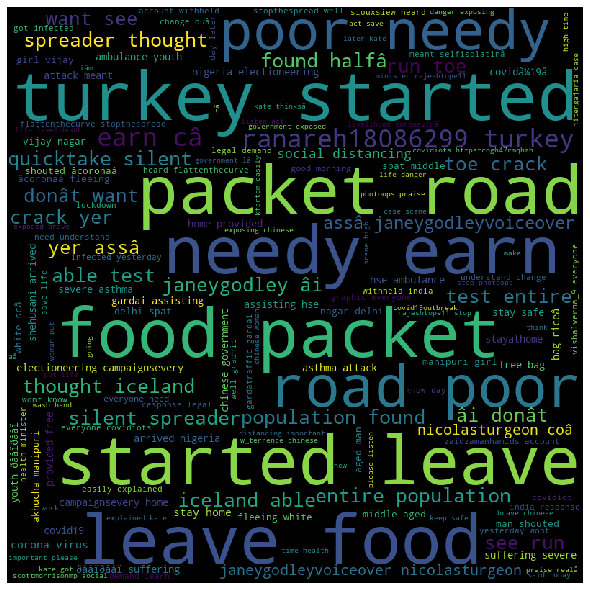

In [39]:
# iterate through the csv file 
for val in text_cln.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 